In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
%matplotlib inline

In [40]:
training_labels = pd.read_csv("labels_training_set.csv", low_memory=False)
labels_predict = pd.read_csv("trocafone_kaggle_test.csv", low_memory=False)
features = pd.read_csv("data_set.csv", low_memory = False)

In [41]:
training_labels = training_labels[['person','label']]
training_labels['label'].value_counts()

0    18434
1      980
Name: label, dtype: int64

In [42]:
print(training_labels.shape)
training_labels = pd.merge(features, training_labels, on='person', how='inner')
print(training_labels.shape)
training_labels.head(2)

(19414, 2)
(19414, 195)


,person,Direct,Email,Organic,Paid,Referral,Social,ad campaign hit,brand listing,checkout,...,suma_resolution,promedio_resolution,maximo_resolution,minimo_resolution,Unnamed: 0,promedio de TFIdf modelo,Suma de TFidf modelo,Maximo de TFIdf modelo,Minimo de TFIdf modelo,label
0,0008ed71,2.0,0.0,0.0,0.0,0.0,0.0,0,0,3,...,4147200,691200.000000,2073600,0,0.0,1.617163,4.851488,1.859879,1.300103,0
1,000c79fe,0.0,0.0,0.0,0.0,0.0,0.0,1,0,1,...,230400,13552.941176,230400,0,4.0,1.000000,4.000000,1.000000,1.000000,0


In [43]:
print(labels_predict.shape)
labels_predict = pd.merge(features, labels_predict, on='person', how='inner')
print(labels_predict.shape)
labels_predict.head(2)

(19415, 1)
(19415, 194)


,person,Direct,Email,Organic,Paid,Referral,Social,ad campaign hit,brand listing,checkout,...,minimo,suma_resolution,promedio_resolution,maximo_resolution,minimo_resolution,Unnamed: 0,promedio de TFIdf modelo,Suma de TFidf modelo,Maximo de TFIdf modelo,Minimo de TFIdf modelo
0,00091926,1.0,0.0,25.0,0.0,0.0,0.0,15,25,2,...,20180503220829,26738688,59684.571429,786432,0,1.0,1.490856,557.580165,2.209395,1.0
1,00091a7a,0.0,0.0,0.0,0.0,0.0,0.0,1,5,0,...,20180326145111,230400,23040.000000,230400,0,2.0,1.219303,3.657909,1.357806,1.0


In [45]:
train = training_labels
target = 'label'
IDcol = 'person'
predictors = [x for x in train.columns if x not in [target, IDcol]]

In [46]:
pca = PCA(n_components=50)
X_train_transformed = pca.fit_transform(train[predictors])
X_submission_transformed = pca.transform(labels_predict[predictors])

In [48]:
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split( 
    X_train_transformed, train[target], test_size=0.2, random_state=13)

In [81]:
components = [5, 10, 15, 20, 25, 30, 35, 40, 45, 50]
neighbors = list(range(1,30))

scores = np.zeros( (components[len(components)-1]+1, neighbors[len(neighbors)-1]+1 ) )

In [82]:
for component in components:
    for n in neighbors:
        knn = KNeighborsClassifier(n_neighbors=n)
        knn.fit(X_train_pca[:,:component], y_train_pca)
        score = knn.score(X_test_pca[:,:component], y_test_pca)
        #predict = knn.predict(X_test_pca[:,:component])
        scores[component][n] = score
        
        print('Components = ', component, ', neighbors = ', n,', Score = ', score)  

Components =  5 , neighbors =  1 , Score =  0.9137265001287664
Components =  5 , neighbors =  2 , Score =  0.9464331702292043
Components =  5 , neighbors =  3 , Score =  0.943342776203966
Components =  5 , neighbors =  4 , Score =  0.9477208344063868
Components =  5 , neighbors =  5 , Score =  0.9469482359000773
Components =  5 , neighbors =  6 , Score =  0.9492660314190059
Components =  5 , neighbors =  7 , Score =  0.9490084985835694
Components =  5 , neighbors =  8 , Score =  0.9495235642544424
Components =  5 , neighbors =  9 , Score =  0.9495235642544424
Components =  5 , neighbors =  10 , Score =  0.9492660314190059
Components =  5 , neighbors =  11 , Score =  0.9495235642544424
Components =  5 , neighbors =  12 , Score =  0.9492660314190059
Components =  5 , neighbors =  13 , Score =  0.9495235642544424
Components =  5 , neighbors =  14 , Score =  0.9492660314190059
Components =  5 , neighbors =  15 , Score =  0.9495235642544424
Components =  5 , neighbors =  16 , Score =  0.949

Components =  25 , neighbors =  13 , Score =  0.9495235642544424
Components =  25 , neighbors =  14 , Score =  0.9492660314190059
Components =  25 , neighbors =  15 , Score =  0.9495235642544424
Components =  25 , neighbors =  16 , Score =  0.9495235642544424
Components =  25 , neighbors =  17 , Score =  0.9495235642544424
Components =  25 , neighbors =  18 , Score =  0.9495235642544424
Components =  25 , neighbors =  19 , Score =  0.9495235642544424
Components =  25 , neighbors =  20 , Score =  0.9495235642544424
Components =  25 , neighbors =  21 , Score =  0.9495235642544424
Components =  25 , neighbors =  22 , Score =  0.9495235642544424
Components =  25 , neighbors =  23 , Score =  0.9495235642544424
Components =  25 , neighbors =  24 , Score =  0.9495235642544424
Components =  25 , neighbors =  25 , Score =  0.9495235642544424
Components =  25 , neighbors =  26 , Score =  0.9495235642544424
Components =  25 , neighbors =  27 , Score =  0.9495235642544424
Components =  25 , neighb

Components =  45 , neighbors =  24 , Score =  0.9495235642544424
Components =  45 , neighbors =  25 , Score =  0.9495235642544424
Components =  45 , neighbors =  26 , Score =  0.9495235642544424
Components =  45 , neighbors =  27 , Score =  0.9495235642544424
Components =  45 , neighbors =  28 , Score =  0.9495235642544424
Components =  45 , neighbors =  29 , Score =  0.9495235642544424
Components =  50 , neighbors =  1 , Score =  0.9126963687870203
Components =  50 , neighbors =  2 , Score =  0.9464331702292043
Components =  50 , neighbors =  3 , Score =  0.943342776203966
Components =  50 , neighbors =  4 , Score =  0.9477208344063868
Components =  50 , neighbors =  5 , Score =  0.9469482359000773
Components =  50 , neighbors =  6 , Score =  0.9492660314190059
Components =  50 , neighbors =  7 , Score =  0.9490084985835694
Components =  50 , neighbors =  8 , Score =  0.9495235642544424
Components =  50 , neighbors =  9 , Score =  0.9495235642544424
Components =  50 , neighbors =  10 

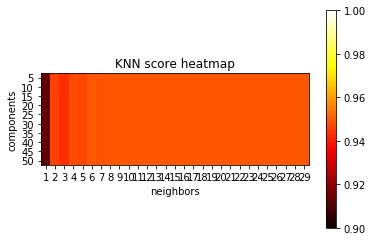

In [85]:
scores = np.reshape(scores[scores != 0], (len(components), len(neighbors)))

x = list(range(0,29))
y = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

plt.rcParams["axes.grid"] = False

fig, ax = plt.subplots()
plt.imshow(scores, cmap='hot', interpolation='none', vmin=.90, vmax=1)
plt.xlabel('neighbors')
plt.ylabel('components')
plt.xticks(x, neighbors)
plt.yticks(y, components)
plt.title('KNN score heatmap')

plt.colorbar()
plt.show()

In [86]:
knn = KNeighborsClassifier(n_neighbors=8)
knn.fit(X_train_pca[:, :35], y_train_pca)

predict_labels = knn.predict_proba(X_submission_transformed[:, :35])

In [87]:
predict_labels

array([[0.875, 0.125],
       [0.875, 0.125],
       [0.875, 0.125],
       ...,
       [1.   , 0.   ],
       [1.   , 0.   ],
       [1.   , 0.   ]])

In [92]:
submission = pd.DataFrame(predict_labels)
df_kaggel_knn = pd.DataFrame(submission[1])
df_kaggel_knn["person"] = labels_predict[IDcol]
df_kaggel_knn.rename(columns = {1: 'label'},inplace = True) 
df_kaggel_knn = df_kaggel_knn[['person','label']]

df_kaggel_knn.to_csv("KnnPCASubmission.csv", index=False)

df_kaggel_knn.head(5)

,person,label
0,00091926,0.125
1,00091a7a,0.125
2,000ba417,0.125
3,000e4d9e,0.125
4,000e619d,0.125


In [93]:
df_kaggel_knn['label'].value_counts()

0.000    13675
0.125     4378
0.250     1054
0.375      261
0.500       31
0.625       16
Name: label, dtype: int64